# **MÓDULO 19**
# Exercício: Estatística Aplicada

**Efetividade de Duas Estratégias de Ensino**

Imagine que uma escola esteja avaliando a eficácia de duas estratégias de ensino de matemática para alunos do ensino médio. Eles querem determinar se há uma diferença significativa no desempenho médio dos alunos entre as duas estratégias.

# **Hipóteses:**

* Hipótese nula (H0): A média das notas dos alunos na estratégia A é igual à média das notas dos alunos na estratégia B.
* Hipótese alternativa (H1): A média das notas na Estratégia B é maior do que a média das notas na Estratégia A.

# **Dados:**

* Amostra da Estratégia A: Notas de 50 alunos que receberam a Estratégia A.
* Amostra da Estratégia B: Notas de 50 alunos que receberam a Estratégia B.

Usaremos um teste Z para comparar as médias das notas entre as duas amostras.

Se o p-valor do teste Z for menor que um nível de significância pré-determinado (por exemplo, α = 0.05), rejeitamos a hipótese nula e concluímos que há uma diferença significativa nas médias das notas entre as duas estratégias de ensino.

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

Os dados são criados a seguir:

In [18]:
# Definindo médias e desvios padrão para as notas nas duas estratégias
media_estrategia_A = 70
desvio_padrao_estrategia_A = 10

media_estrategia_B = 75
desvio_padrao_estrategia_B = 12

# Gerando as amostras de notas para cada estratégia de ensino da nossa base
np.random.seed(0)  # Para garantir a reprodutibilidade dos resultados
amostra_estrategia_A = np.random.normal(loc=media_estrategia_A, scale=desvio_padrao_estrategia_A, size=50)
amostra_estrategia_B = np.random.normal(loc=media_estrategia_B, scale=desvio_padrao_estrategia_B, size=50)

print("Notas da Estratégia A:", amostra_estrategia_A[:5])
print("Notas da Estratégia B:", amostra_estrategia_B[:5])

Notas da Estratégia A: [87.64052346 74.00157208 79.78737984 92.40893199 88.6755799 ]
Notas da Estratégia B: [64.25440127 79.64282997 68.87033835 60.83241379 74.66181326]


# 1) De acordo com as informações analisadas o nosso teste é unilateral á direita, esquerda ou bicaudal? Justifique.




    Unilateral à direita

    Porque a hipótese alternativa diz que a média da Estratégia B é maior que a da A (μB ​> μA).
    Logo, só nos interessam valores grandes de Z, que ficam na cauda direita da distribuição normal.


# 2) Calcule as médias para as duas amostragens e as variâncias. Quais insights você pode retirar comparando os dados?

    Insights:
    
    A média da Estratégia B fica próxima de 75, maior que a da Estratégia A (71). Isso já sugere que a Estratégia B pode ser mais eficaz.

    A variância da Estratégia B deve ser um pouco maior. Isso significa que o desempenho dos alunos com a Estratégia B é mais disperso, mesmo que a média seja superior

In [19]:
media_A = np.mean(amostra_estrategia_A)
media_B = np.mean(amostra_estrategia_B)

variancia_A = np.var(amostra_estrategia_A, ddof=1)
variancia_B = np.var(amostra_estrategia_B, ddof=1)

print(f"Média Estratégia A: {media_A:.2f}")
print(f"Variância Estratégia A: {variancia_A:.2f}")
print(f"Média Estratégia B: {media_B:.2f}")
print(f"Variância Estratégia B: {variancia_B:.2f}")


Média Estratégia A: 71.41
Variância Estratégia A: 129.27
Média Estratégia B: 74.75
Variância Estratégia B: 110.47


# 3) Imprima os resultados da estatística do teste Z, p value e indique se rejeitaremos ou não a hipótese nula. Justifique sua resposta.

In [20]:
media_estrategia_A = 70
desvio_padrao_estrategia_A = 10

media_estrategia_B = 75
desvio_padrao_estrategia_B = 12

np.random.seed(0)
amostra_estrategia_A = np.random.normal(loc=media_estrategia_A, scale=desvio_padrao_estrategia_A, size=50)
amostra_estrategia_B = np.random.normal(loc=media_estrategia_B, scale=desvio_padrao_estrategia_B, size=50)

mean_A = np.mean(amostra_estrategia_A)
mean_B = np.mean(amostra_estrategia_B)
nA = len(amostra_estrategia_A)
nB = len(amostra_estrategia_B)

sigma_A = desvio_padrao_estrategia_A
sigma_B = desvio_padrao_estrategia_B
se = np.sqrt(sigma_A**2/nA + sigma_B**2/nB)
Z = (mean_B - mean_A) / se


p_value = 1 - stats.norm.cdf(Z)

alpha = 0.05
reject = p_value < alpha

print(f"Média A (amostral): {mean_A:.4f}")
print(f"Média B (amostral): {mean_B:.4f}")
print(f"Z estatístico: {Z:.4f}")
print(f"p-valor (unilateral direita): {p_value:.6f}")
print(f"Rejeitar H0 a {alpha:.2f}? {'SIM' if reject else 'NÃO'}")

Média A (amostral): 71.4056
Média B (amostral): 74.7487
Z estatístico: 1.5133
p-valor (unilateral direita): 0.065096
Rejeitar H0 a 0.05? NÃO


    Embora a média de B seja maior que a de A, o p-valor (0,065) é maior que 0,05, logo não há evidência estatística suficiente (ao nível de 5%) para concluir que a Estratégia B tem média superior à A.

# 4) Para finalizar monte o gráfico da distribuição da estatística do nosso teste Z e explique o que pode ser observado através dele.

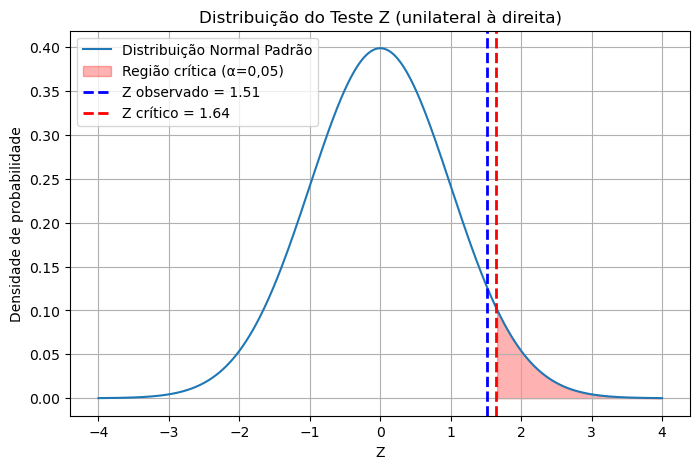

In [21]:
x = np.linspace(-4, 4, 500)
y = stats.norm.pdf(x, 0, 1)

# Limite crítico para alpha=0.05 (teste unilateral à direita)
z_crit = stats.norm.ppf(0.95)

# Plotando a curva da distribuição normal padrão
plt.figure(figsize=(8,5))
plt.plot(x, y, label='Distribuição Normal Padrão')

# Região crítica (cauda direita)
plt.fill_between(x, 0, y, where=(x >= z_crit), color='red', alpha=0.3, label='Região crítica (α=0,05)')

# Linha do valor observado Z
plt.axvline(Z, color='blue', linestyle='--', linewidth=2, label=f'Z observado = {Z:.2f}')

# Linha do valor crítico
plt.axvline(z_crit, color='red', linestyle='--', linewidth=2, label=f'Z crítico = {z_crit:.2f}')

plt.title("Distribuição do Teste Z (unilateral à direita)")
plt.xlabel("Z")
plt.ylabel("Densidade de probabilidade")
plt.legend()
plt.grid(True)
plt.show()

    A curva azul representa a distribuição normal padrão do teste Z.

    A faixa mermelha é a região crítica, ondee rejeitamos o H0.

    A linha vermelha tracejada mostra o valor crítico Z 1,645.

    A linha azul tracejada marca o valor do Z obcervado = 1,51